<h2>Class Imbalance Equalisation</h2>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../datasets/Healthcare-Diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


<h3>1. The Class Imbalance Problem</h3>

We learned that a good model is one that has an <span style="color:blue;">overall good predictive accuracy</span> and at the same time
has <span style="color:blue;">good predictive accuracy per class</span>. 

The <b>recall</b> of a model can however be influenced by the distribution of observation data per class. If this distribution is not uniform, the model may learn better one class in the dataset over the other(s). Hence, <span style="color:blue;">Class Imbalance Equalisation</span> is a necessary preprocessing stage in classification. 

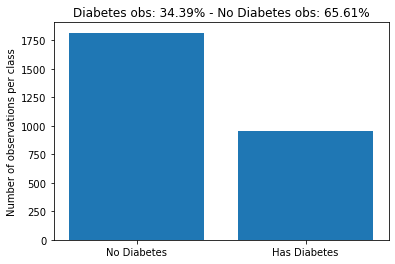

In [56]:
has_db_df = df[df['Outcome']==1] #get observations with diabetes
has_nodb_df = df[df['Outcome']==0] #get observations without diabetes

labels = df['Outcome'].unique()
class_count = [len(has_db_df), len(has_nodb_df)]
N = len(df)#total number of observations

perc_diab = class_count[0]*100/N
perc_ndiab = class_count[1]*100/N

plt.figure()
plt.bar(labels,class_count)
plt.xticks(labels,['Has Diabetes', 'No Diabetes'])
plt.ylabel('Number of observations per class')
plt.title('Diabetes obs: %.2f%% - No Diabetes obs: %.2f%%'%(perc_diab,perc_ndiab))
plt.show()

<h2>2. Correction Methods</h2>
<ul>
    <li><b>Downsampling the majority class</b></li>
    <li><b>Upsampling the minority class</b></li>
    <li><b>Upsampling the minority class + downsampling majority class</b></li>
    <li><b>Synthetic Upsampling the minority class (SMOTE)</b></li>    
<ul/>
    

In [57]:
#pip install imblearn

In [21]:
N = len(df) #total number of records
N_db = class_count[0] #total number of records with diabetes
N_ndb = class_count[1] #total number of records without diabetes

<h3>2.1. Donwsampling the majority class</h3>

In [58]:
from sklearn.utils import resample

#Take randomly a subset of the majority class of the same size as the minority class
maj_ndb_df = resample(has_nodb_df, 
                      replace=False,#do not allow duplicates
                      n_samples = N_db,#same size has minority class
                      random_state = 1234 #constant seed for reproducibility
                     )

downsampled_df = pd.concat([has_db_df,maj_ndb_df])#create new dataframe

In [59]:
downsampled_df['Outcome'].value_counts()

1    952
0    952
Name: Outcome, dtype: int64

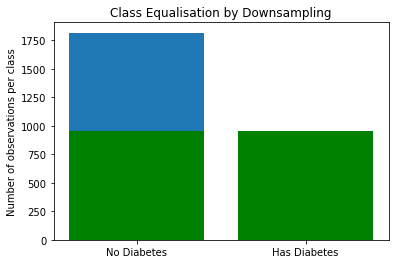

In [60]:
class_count_downsampled_data = downsampled_df['Outcome'].value_counts()
class_count_downsampled = [class_count_downsampled_data[0], class_count_downsampled_data[1]]

plt.figure()
plt.bar(labels,class_count)
plt.bar(labels,class_count_downsampled,color='green')
plt.xticks(labels,['Has Diabetes', 'No Diabetes'])
plt.ylabel('Number of observations per class')
plt.title('Class Equalisation by Downsampling')
plt.show()

<h3>2.2. Upsampling the minority class</h3>


In [61]:
#Form randomly a new datagroup of the minority class of the same size as the majority class
min_db_df = resample(has_db_df, 
                      replace=True,#allow duplicates
                      n_samples = N_ndb,#same size has majority class
                      random_state = 1234 #constant seed for reproducibility
                     )

upsampled_df = pd.concat([has_nodb_df,min_db_df])#create new dataframe

In [39]:
upsampled_df['Outcome'].value_counts()

0    1816
1    1816
Name: Outcome, dtype: int64

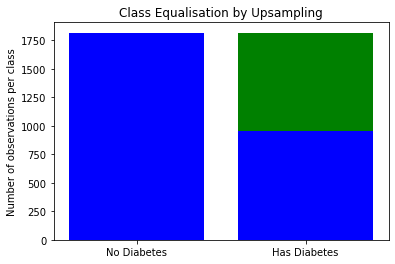

In [62]:
class_count_upsampled_data = upsampled_df['Outcome'].value_counts()
class_count_upsampled = [class_count_upsampled_data[0], class_count_upsampled_data[1]]

plt.figure()
plt.bar(labels,class_count_upsampled,color='green')
plt.bar(labels,class_count,color='blue')
plt.xticks(labels,['Has Diabetes', 'No Diabetes'])
plt.ylabel('Number of observations per class')
plt.title('Class Equalisation by Upsampling')
plt.show()

<h3>2.3. Upsampling the minority class + downsampling majority class</h3>

<h3>2.4.  Synthetic Minority Over-sampling Technique</h3>

Oversampling the minority class may lead to overfitting as some data points are replicated more than once. Moreover, no additional information is added when oversampling the minority class.
A different approach to classical oversampling is the use of the synthetic minority oversampling technique:
SMOTE

<ol>
    <li>Select k-Nearest neighbours from a minority class data point $x_i$</li>
    <li>Randomly pick one of them $x_j$</li>
    <li>Generate a new datapoint along the segment between $x_l= x_i + r(x_j-x_i)$</li>
</ol>

<img src="Media/smote.png" width="400px" />

In [50]:
X_train = df.drop(columns=['Outcome'])
y_train = df[['Outcome']]

In [66]:
y_train['Outcome'].value_counts()

0    1816
1     952
Name: Outcome, dtype: int64

In [68]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 1234) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)#sm.fit(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
#print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
#print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (3632, 9)
After OverSampling, the shape of train_y: (3632, 1) 



In [67]:
y_train_res['Outcome'].value_counts()

1    1816
0    1816
Name: Outcome, dtype: int64